<a href="https://colab.research.google.com/github/ulmkat/ulmkat.github.io/blob/main/Heinin_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import pandas as pd

# Print the current working directory
print("Current working directory:", os.getcwd())

# List all files in the current working directory
print("Files in current directory:", os.listdir())

# If the file is in the current directory, this should work
file_path = "prepro_data_heini.csv"
try:
    df = pd.read_csv(file_path)
    df.head(2)
    print("File successfully read!")
except FileNotFoundError:
    print("File not found in the current directory. Please provide the correct path.")

# If the file is in a different directory, provide the full path:
file_path = "/path/to/your/file/prepro_data_heini.csv"
df = pd.read_csv(file_path)
df.head(2)

Current working directory: /content
Files in current directory: ['.config', 'prepro_data_heini.csv', 'sample_data']
File successfully read!


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/file/prepro_data_heini.csv'

In [7]:
import os
import pandas as pd

# Print the current working directory
print("Current working directory:", os.getcwd())

# List all files in the current working directory
print("Files in current directory:", os.listdir())

# If the file is in the current directory, this should work
file_path = "prepro_data_heini.csv"
try:
    df = pd.read_csv(file_path)
    df.head(2)
    print("File successfully read!")
except FileNotFoundError:
    print("File not found in the current directory. Please provide the correct path.")

# If the file is in a different directory, provide the full path:
# Replace this with the actual path to your file
file_path = "prepro_data_heini.csv"  # Example: "/home/user/data/prepro_data_heini.csv"
df = pd.read_csv(file_path)
df.head(2)

Current working directory: /content
Files in current directory: ['.config', 'prepro_data_heini.csv', 'sample_data']
File successfully read!


,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,Convenience Package,Bluetooth,Sunroof/Moonroof,Adaptive Cruise Control,Android Auto,Navigation System,Heated Seats,Third Row Seating,CarPlay,Blind Spot Monitoring
0,6,27.0,55,6,1500.0,0.0,8,42.0,15.8,5,...,0,0,0,0,0,0,0,0,0,0
1,5,21.0,76,6,2400.0,0.0,8,41.2,18.8,5,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['price', 'daysonmarket'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")

In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['price', 'daysonmarket'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Paras parametriyhdistelmä:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Paras parametriyhdistelmä: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
MAE: 1719.70
R² score: 0.96


# Task
Tell me about this dataset.

Here is all the data you need:
"prepro_data_heini.csv"

## Data loading

### Subtask:
Load the dataset "prepro_data_heini.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "prepro_data_heini.csv" into a pandas DataFrame and display its first and last few rows, along with its shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('prepro_data_heini.csv')
    display(df.head())
    display(df.tail())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'prepro_data_heini.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,Convenience Package,Bluetooth,Sunroof/Moonroof,Adaptive Cruise Control,Android Auto,Navigation System,Heated Seats,Third Row Seating,CarPlay,Blind Spot Monitoring
0,6,27.0,55,6,1500.0,0.0,8,42.0,15.8,5,...,0,0,0,0,0,0,0,0,0,0
1,5,21.0,76,6,2400.0,0.0,8,41.2,18.8,5,...,0,0,0,1,0,0,0,0,0,0
2,6,27.0,76,6,1500.0,0.0,8,42.0,15.8,5,...,0,1,0,0,0,0,1,0,0,0
3,5,25.0,76,6,1400.0,0.0,8,40.8,14.0,5,...,0,0,0,0,0,0,0,0,0,0
4,6,29.0,88,6,1400.0,0.0,8,42.0,13.7,5,...,0,0,0,1,0,0,0,0,0,0


,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,Convenience Package,Bluetooth,Sunroof/Moonroof,Adaptive Cruise Control,Android Auto,Navigation System,Heated Seats,Third Row Seating,CarPlay,Blind Spot Monitoring
726215,6,21.0,22,6,2000.0,0.0,45,41.2,14.5,5,...,0,0,0,0,0,0,0,0,0,0
726216,6,24.0,10,6,2500.0,0.0,44,41.6,17.0,5,...,0,1,1,0,0,1,0,0,0,0
726217,6,26.0,59,6,2400.0,0.0,41,45.5,18.5,5,...,0,1,0,1,0,1,1,1,0,0
726218,6,22.0,23,6,2000.0,0.0,45,44.8,17.4,5,...,0,1,0,0,1,0,0,0,1,1
726219,5,21.0,7,6,2000.0,0.0,45,40.1,18.5,5,...,0,1,1,0,1,1,1,1,1,1


(726220, 51)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
I need to explore the dataset using `.info()`, `.describe()`, `.value_counts()`, and `.duplicated()` methods to understand its characteristics.



In [2]:
# Display information about the DataFrame, including data types and missing values.
df.info()

# Generate descriptive statistics for numerical features.
display(df.describe())

# Analyze the distribution of categorical features.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

# Check for and count duplicate rows.
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726220 entries, 0 to 726219
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   body_type                726220 non-null  int64  
 1   city_fuel_economy        726220 non-null  float64
 2   daysonmarket             726220 non-null  int64  
 3   engine_cylinders         726220 non-null  int64  
 4   engine_displacement      726220 non-null  float64
 5   frame_damaged            726220 non-null  float64
 6   franchise_make           726220 non-null  int64  
 7   front_legroom            726220 non-null  float64
 8   fuel_tank_volume         726220 non-null  float64
 9   fuel_type                726220 non-null  int64  
 10  has_accidents            726220 non-null  float64
 11  height                   726220 non-null  float64
 12  highway_fuel_economy     726220 non-null  float64
 13  horsepower               726220 non-null  float64
 14  lati

,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,Convenience Package,Bluetooth,Sunroof/Moonroof,Adaptive Cruise Control,Android Auto,Navigation System,Heated Seats,Third Row Seating,CarPlay,Blind Spot Monitoring
count,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.0,...,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000,726220.000000
mean,5.298407,22.625969,44.574575,9.614849,2354.507174,1.037504,23.365246,41.978323,16.649332,5.0,...,0.065510,0.623435,0.355830,0.162649,0.242991,0.355742,0.427916,0.108054,0.272657,0.252703
std,0.497370,3.589928,42.280934,7.125571,737.057384,0.997735,15.040558,1.221834,2.596917,0.0,...,0.247425,0.484525,0.478764,0.369045,0.428890,0.478738,0.494777,0.310449,0.445326,0.434562
min,4.000000,12.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,38.600000,7.000000,5.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,20.000000,14.000000,6.000000,2000.000000,0.000000,10.000000,41.000000,14.700000,5.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,22.000000,31.000000,6.000000,2300.000000,2.000000,18.000000,41.700000,16.400000,5.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,25.000000,61.000000,6.000000,2500.000000,2.000000,44.000000,42.600000,18.600000,5.0,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,7.000000,35.000000,185.000000,29.000000,5700.000000,2.000000,48.000000,45.800000,27.800000,5.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Number of duplicate rows: 24


## Data analysis

### Subtask:
Perform a more in-depth analysis of the data, focusing on correlations, potential outliers and distributions.


**Reasoning**:
Perform correlation analysis, outlier detection, distribution analysis, and summarize the findings.



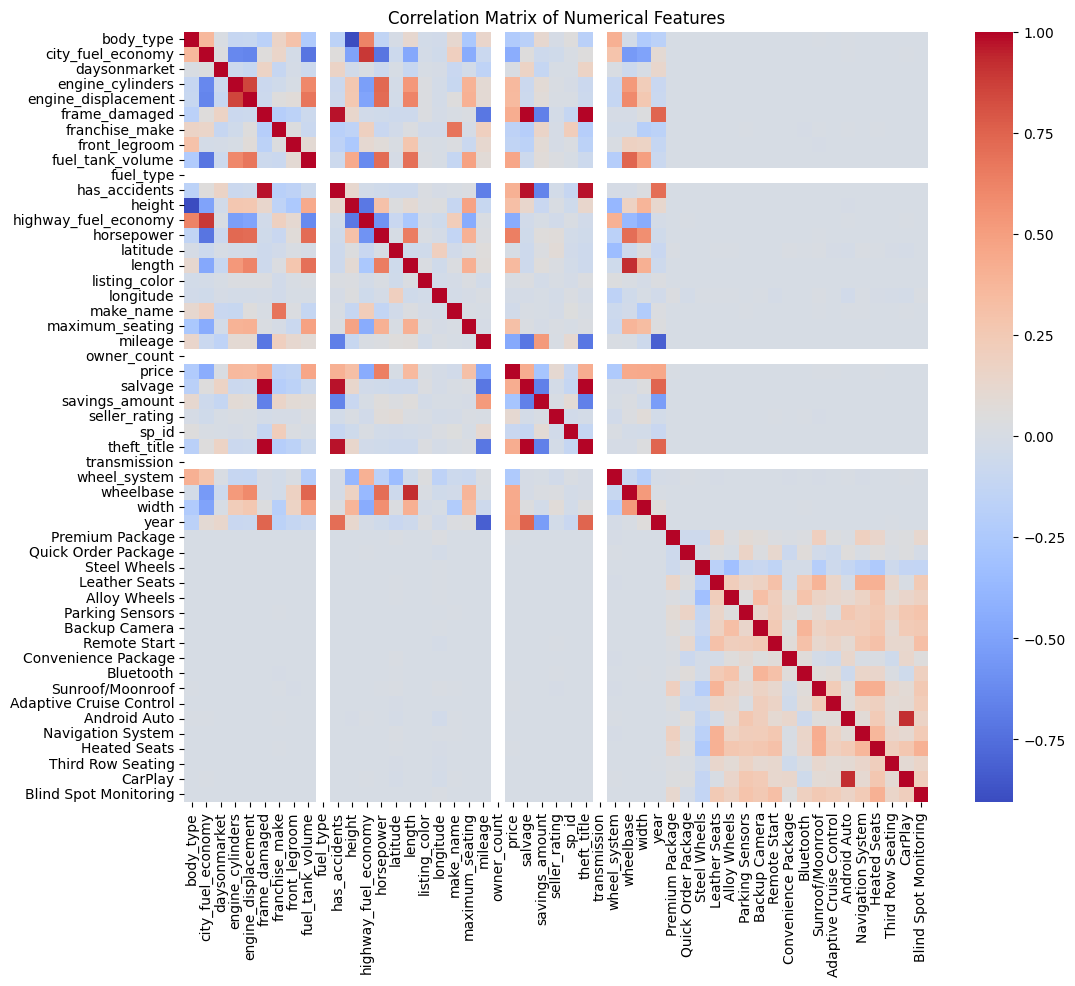

Strong correlations:


,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,Convenience Package,Bluetooth,Sunroof/Moonroof,Adaptive Cruise Control,Android Auto,Navigation System,Heated Seats,Third Row Seating,CarPlay,Blind Spot Monitoring
body_type,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_fuel_economy,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.725130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daysonmarket,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_cylinders,NaN,NaN,NaN,1.000000,0.853063,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_displacement,NaN,NaN,NaN,0.853063,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frame_damaged,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
franchise_make,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
front_legroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_tank_volume,NaN,-0.725130,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


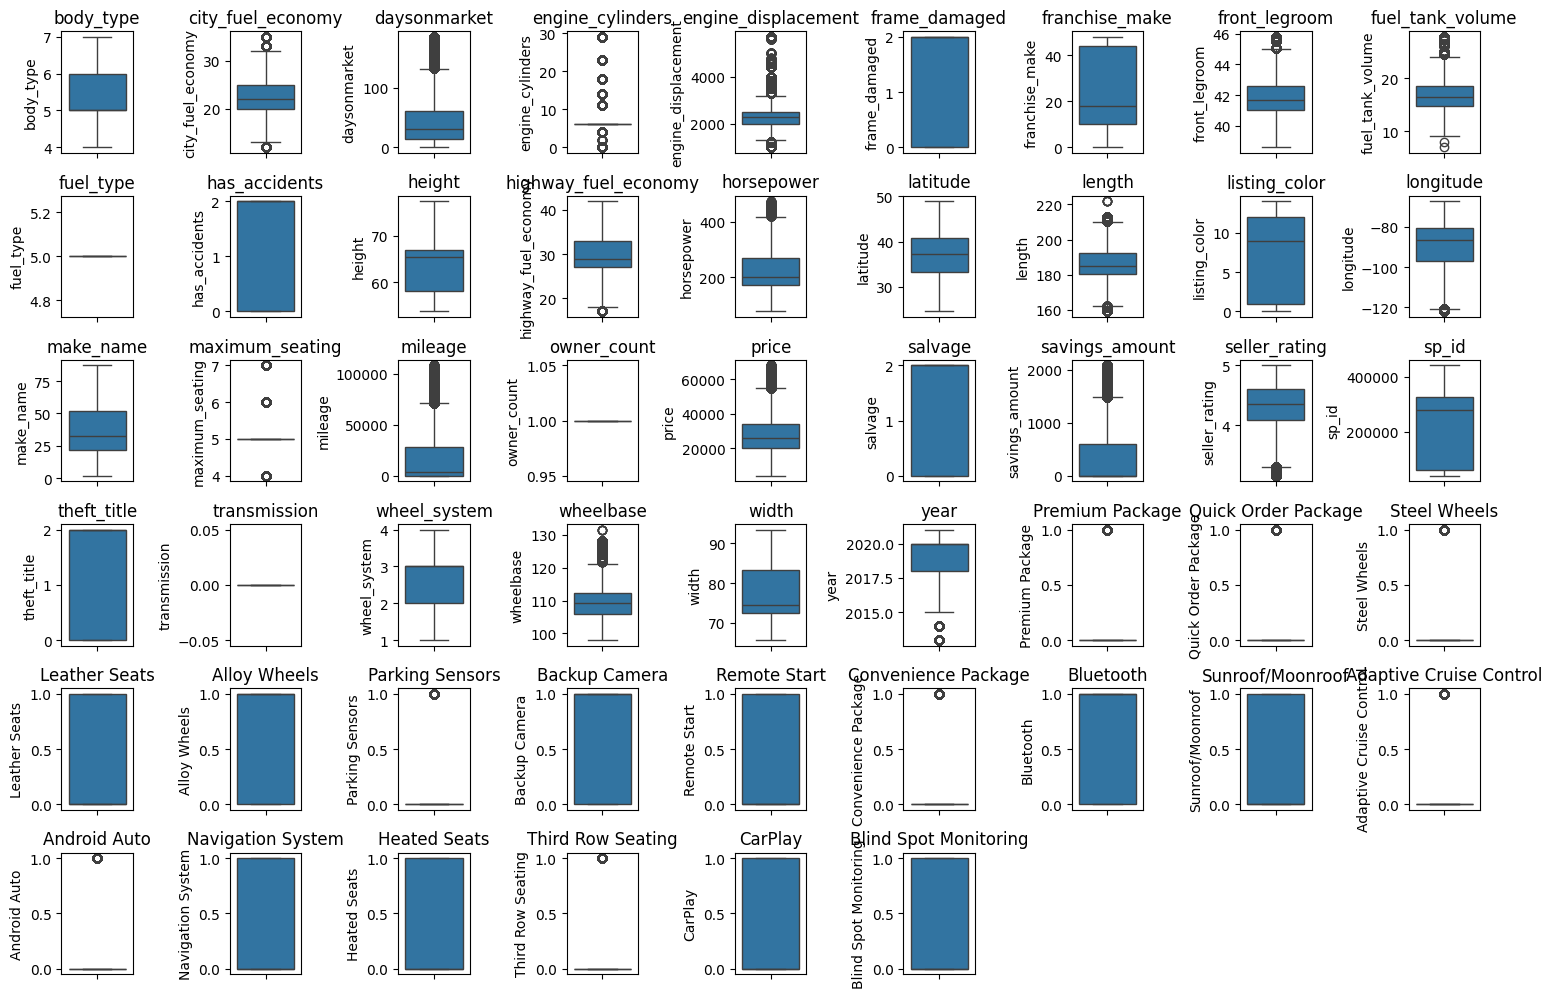

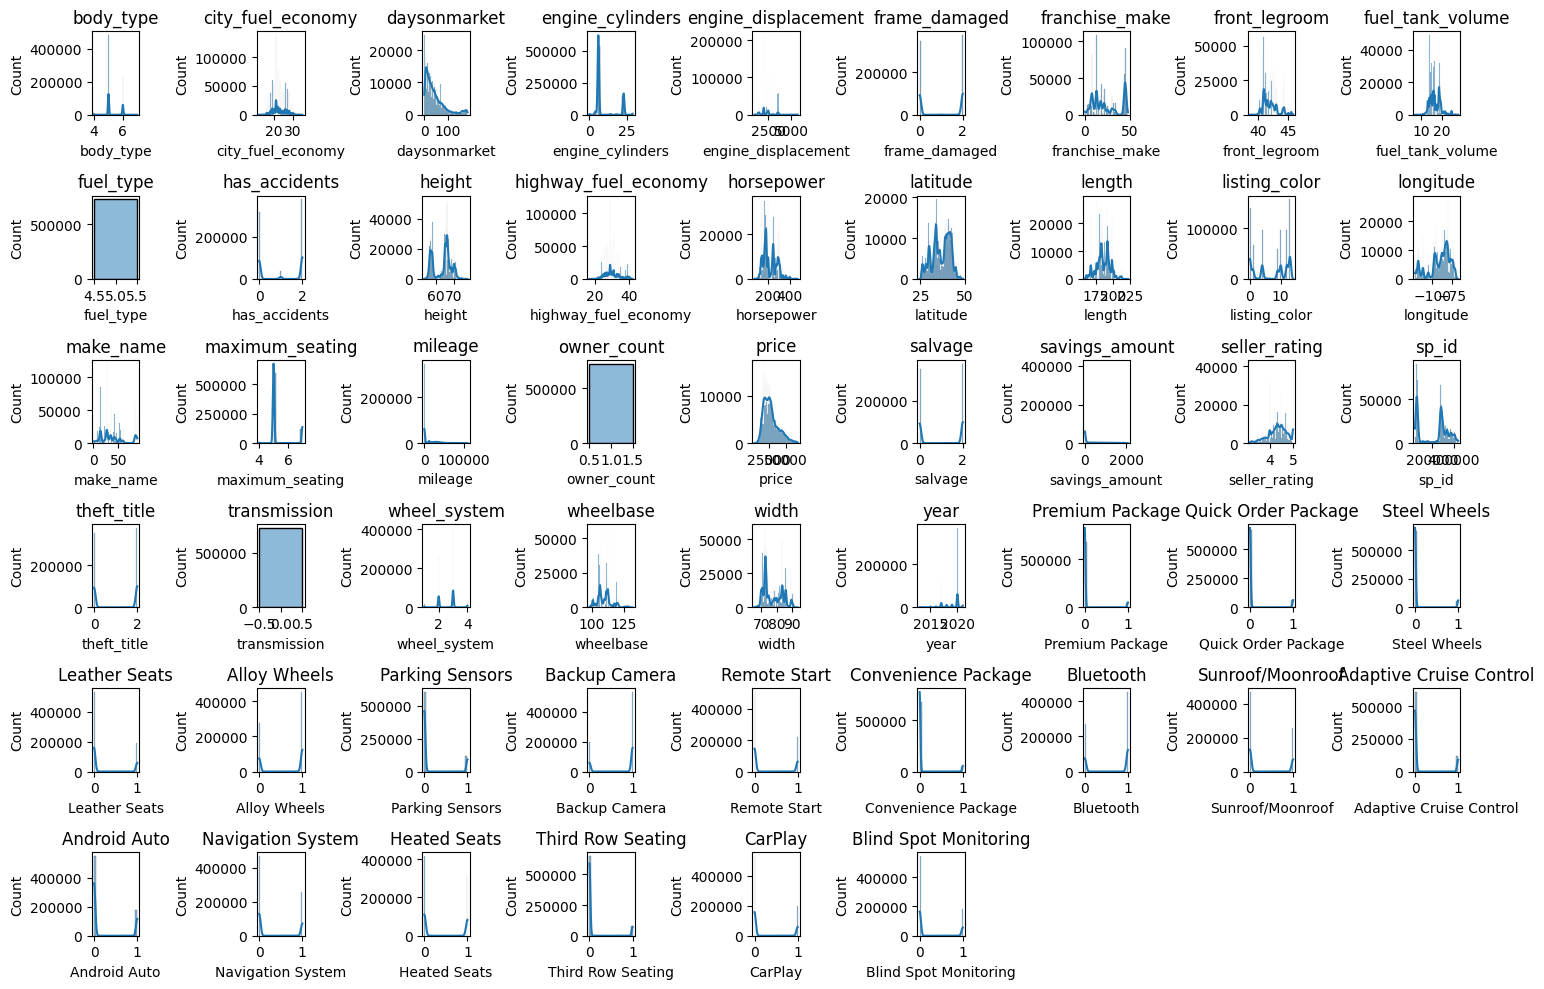

Summary of Analysis:
Correlation Analysis:  A heatmap and table of strong correlations are displayed above.
Outlier Detection: Box plots for each numerical feature are provided above.  Visually inspect for outliers.
Distribution Analysis: Histograms and KDE plots for each numerical feature are shown above. Observe skewness and unusual patterns.
Further analysis should consider the relationships between highly correlated variables, the impact of outliers on statistical measures, and potential transformations for skewed distributions.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify strong correlations (e.g., above 0.7 or below -0.7)
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]
print("Strong correlations:")
display(strong_correlations)

# Outlier Detection (using box plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(6, 9, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

# Distribution Analysis (using histograms and KDE plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(6, 9, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Summarize findings
print("Summary of Analysis:")
print("Correlation Analysis:  A heatmap and table of strong correlations are displayed above.")
print("Outlier Detection: Box plots for each numerical feature are provided above.  Visually inspect for outliers.")
print("Distribution Analysis: Histograms and KDE plots for each numerical feature are shown above. Observe skewness and unusual patterns.")
print("Further analysis should consider the relationships between highly correlated variables, the impact of outliers on statistical measures, and potential transformations for skewed distributions.")

## Data visualization

### Subtask:
Visualize the data to gain further insights into its characteristics and potential relationships between variables.


**Reasoning**:
Create histograms, box plots, bar charts, and scatter plots to visualize the data distribution, potential outliers, and relationships between variables.



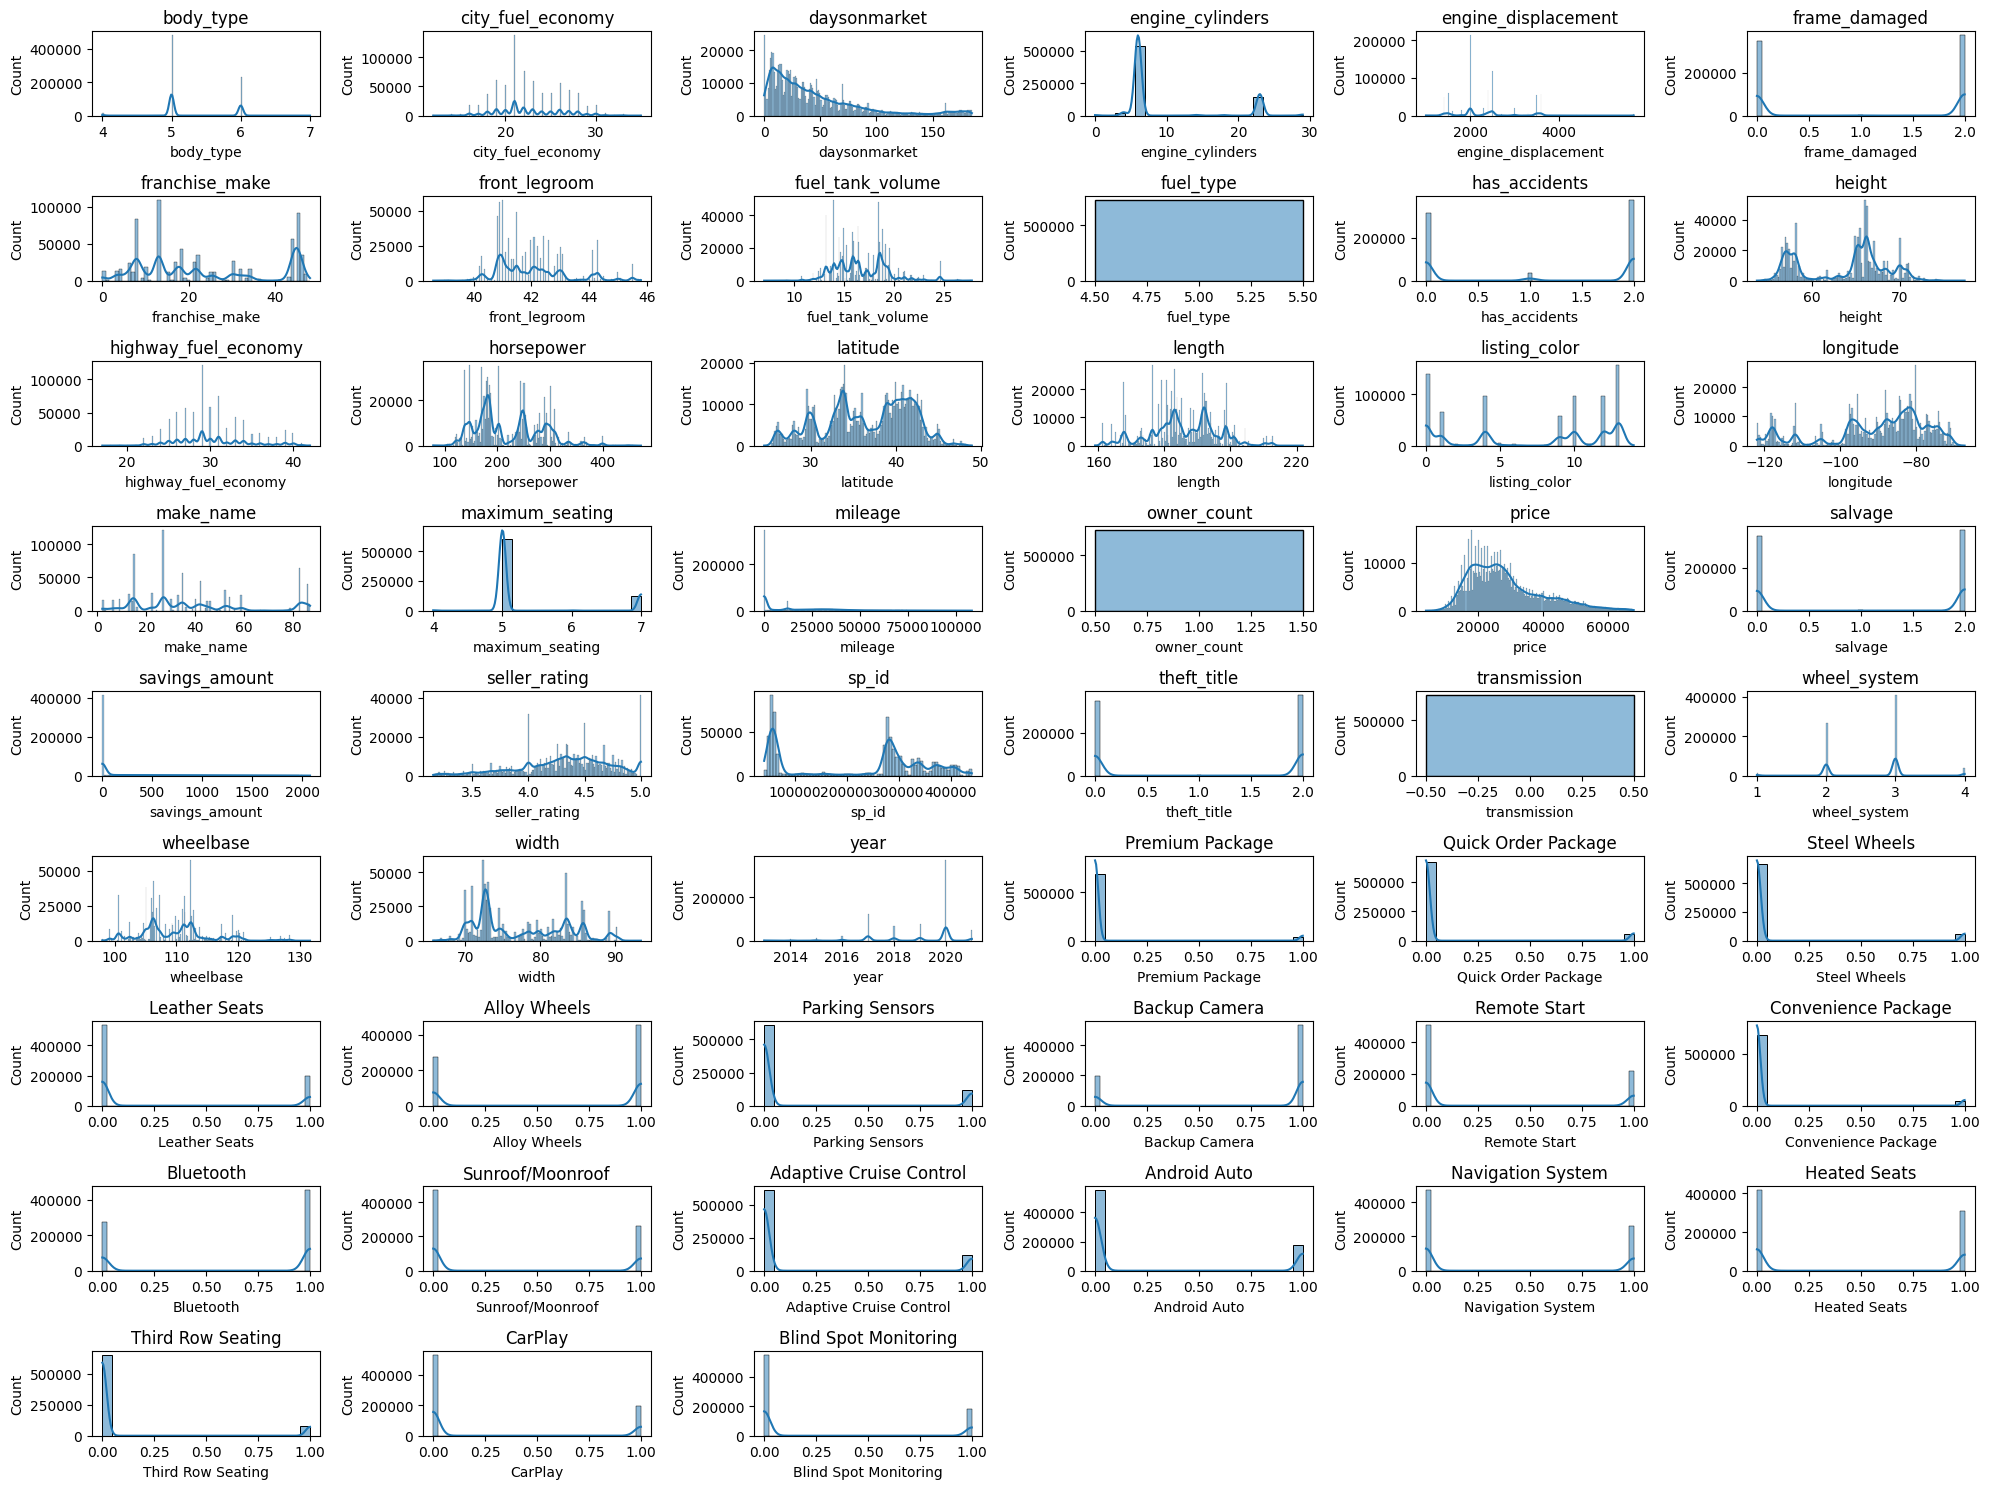

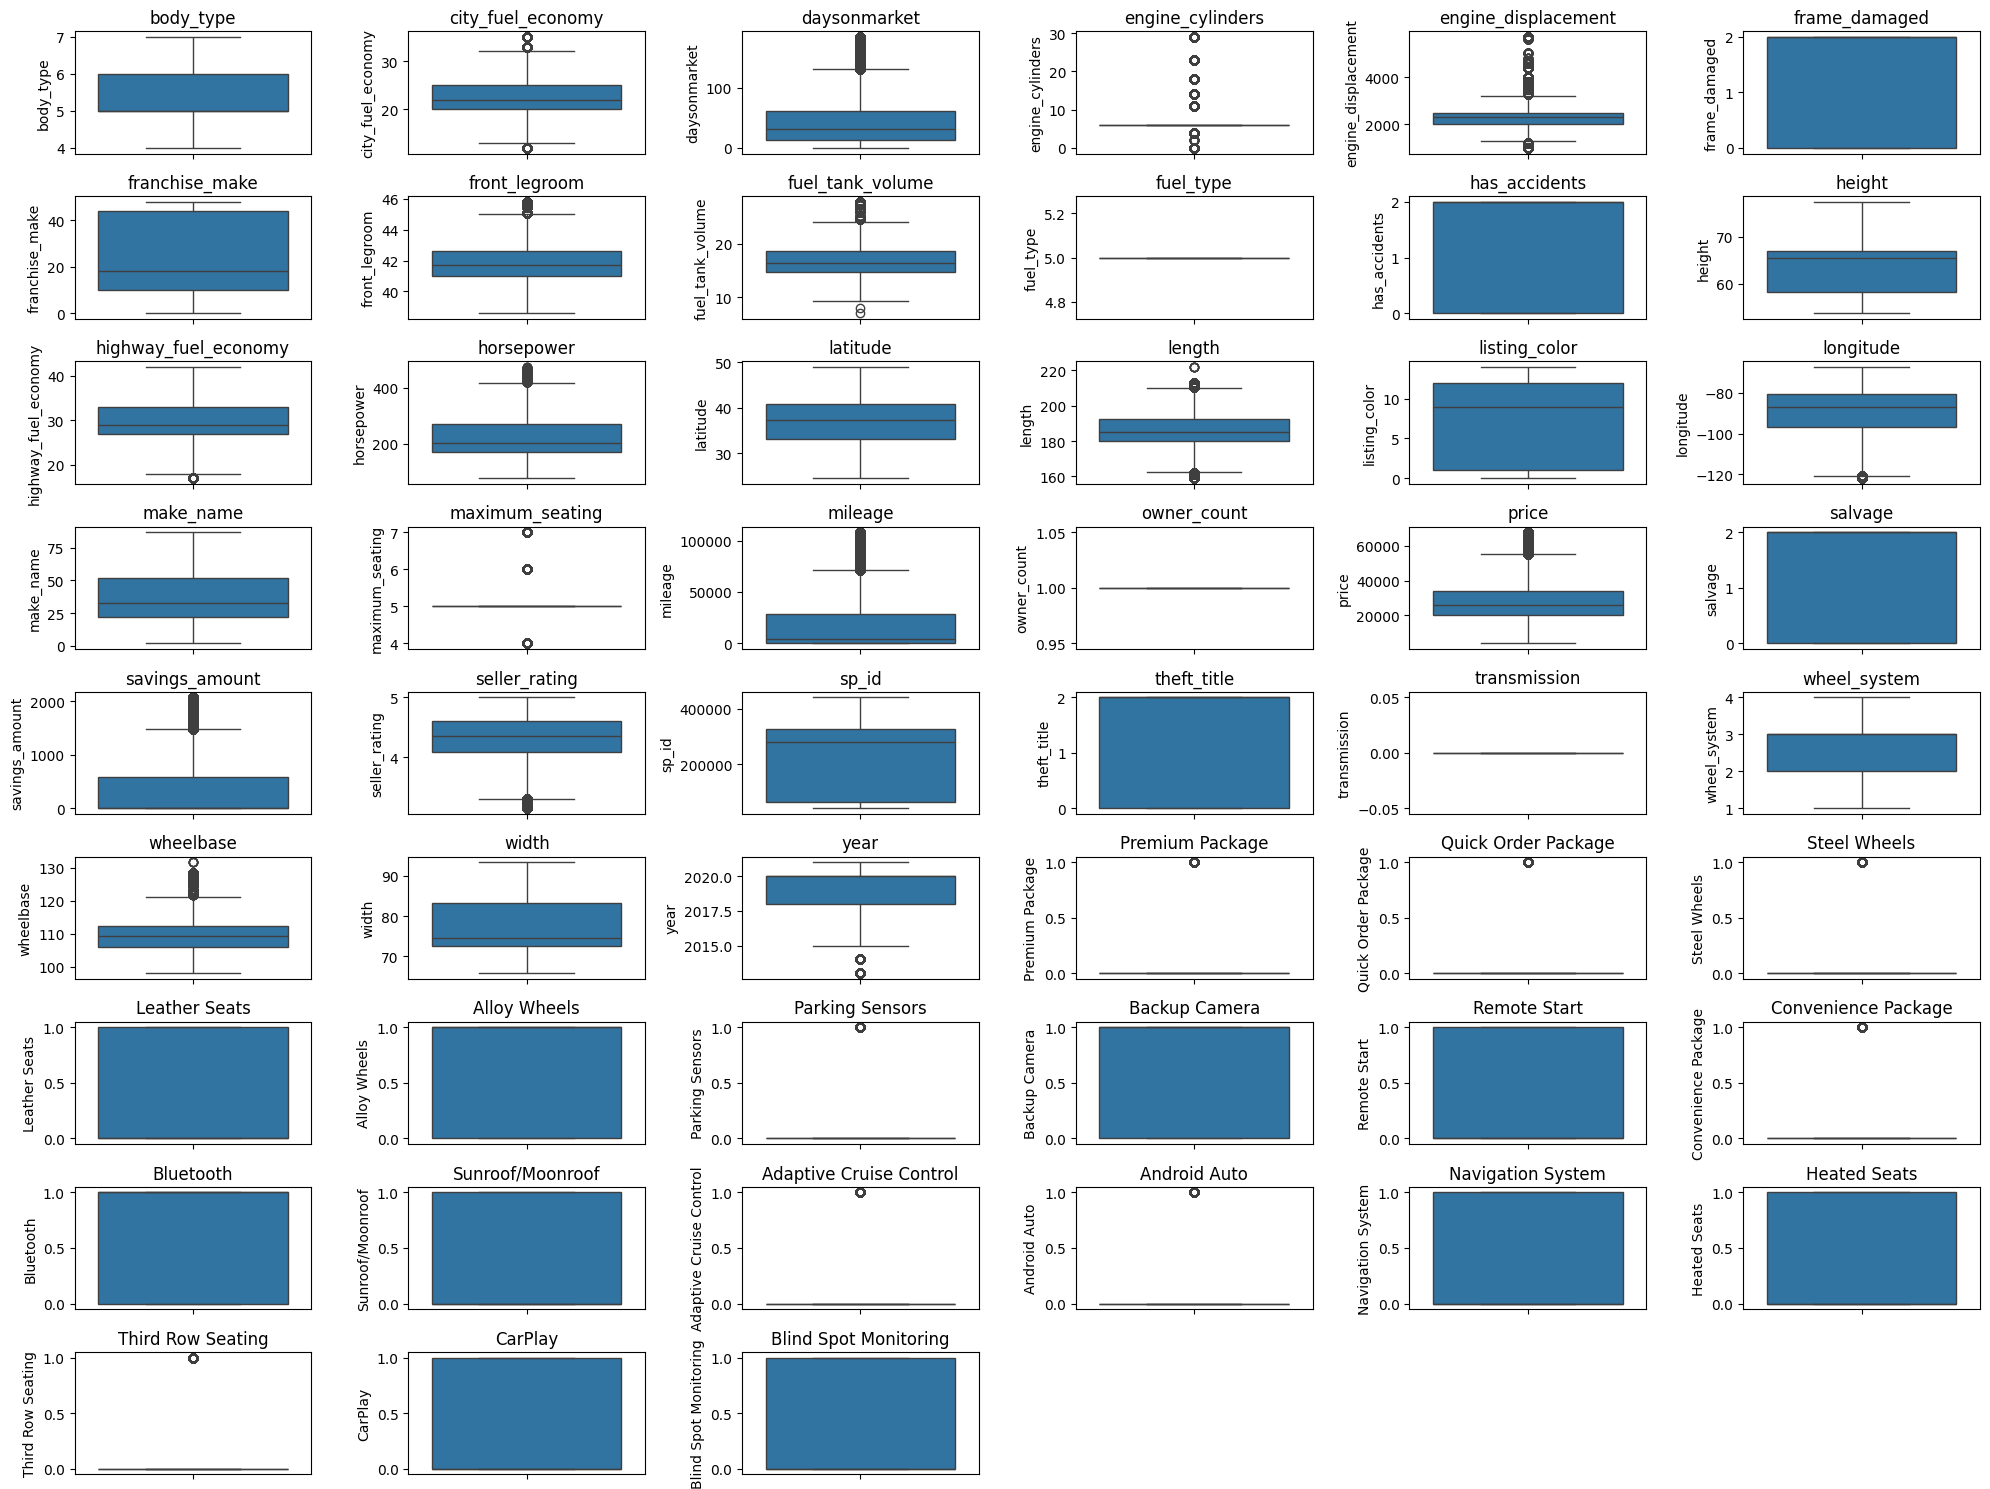

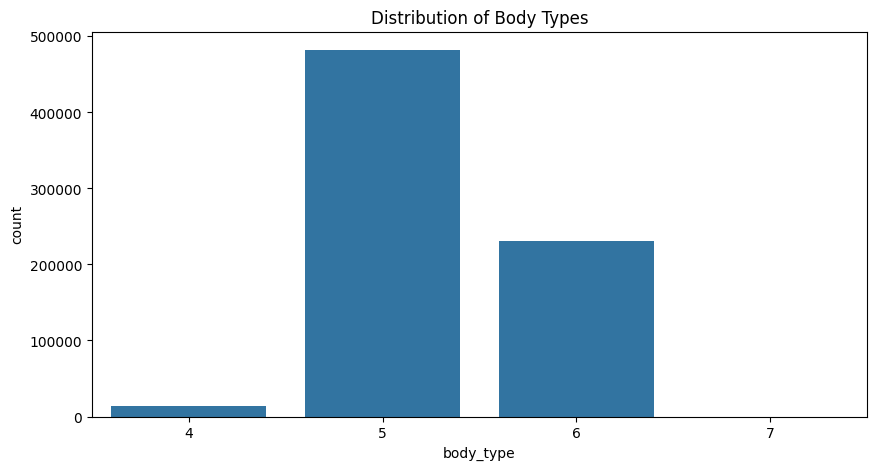

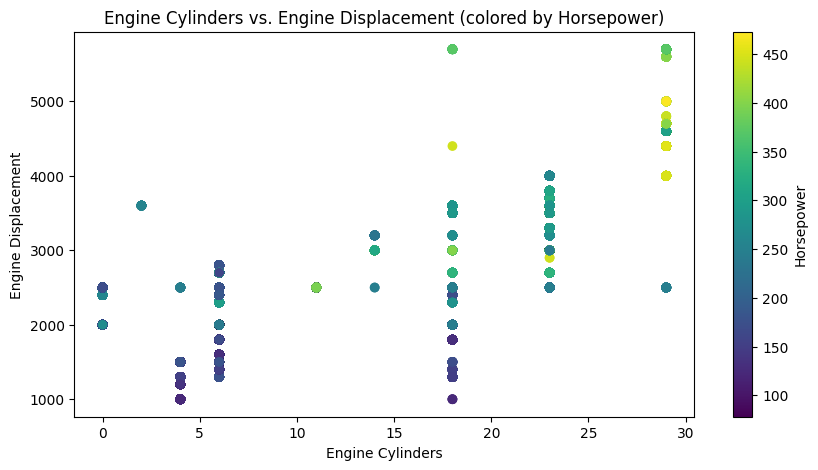

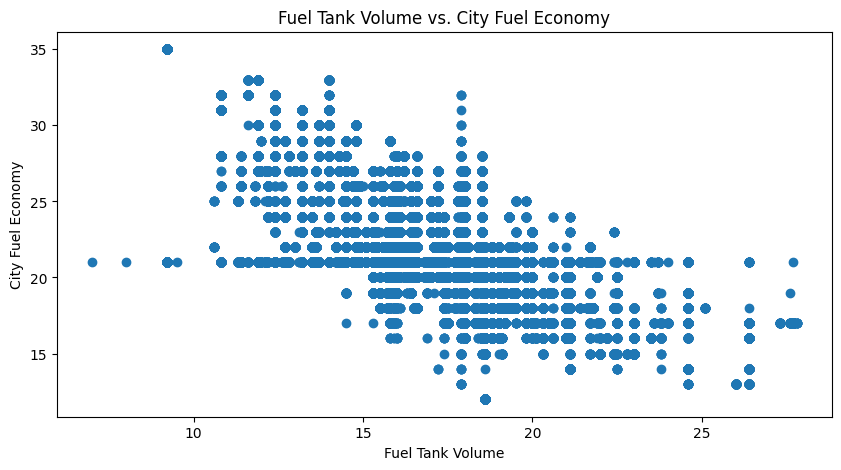

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(9, 6, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(9, 6, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

# Bar chart for categorical features (or binned numerical features)
plt.figure(figsize=(10, 5))
# Assuming 'body_type' is categorical, if not choose another column or create bins
sns.countplot(x='body_type', data=df)
plt.title('Distribution of Body Types')
plt.show()

# Scatter plots for specific numerical feature pairs
plt.figure(figsize=(10, 5))
plt.scatter(df['engine_cylinders'], df['engine_displacement'], c=df['horsepower'], cmap='viridis')
plt.xlabel('Engine Cylinders')
plt.ylabel('Engine Displacement')
plt.title('Engine Cylinders vs. Engine Displacement (colored by Horsepower)')
plt.colorbar(label='Horsepower')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['fuel_tank_volume'], df['city_fuel_economy'])
plt.xlabel('Fuel Tank Volume')
plt.ylabel('City Fuel Economy')
plt.title('Fuel Tank Volume vs. City Fuel Economy')
plt.show()

## Summary:

### 1. Q&A

The provided data analysis task does not explicitly pose questions. However, the analysis implicitly explores questions like:

* What is the overall structure and characteristics of the dataset?
* Are there any strong correlations between the numerical features?
* Are there any outliers in the numerical features?
* What are the distributions of the numerical features?
* What are the relationships between specific pairs of numerical features?


### 2. Data Analysis Key Findings

* **Data Overview:** The dataset consists of 726,220 rows and 51 columns, with all columns having numerical data types (integer or float).  24 duplicate rows were found.
* **Strong Correlations:** Several strong positive and negative correlations were observed. For example:
    * `body_type` and `height` show a strong negative correlation (-0.90).
    * `engine_cylinders` and `engine_displacement` have a strong positive correlation (0.85).
    * `fuel_tank_volume` has a negative correlation with `city_fuel_economy` (-0.73) and a positive correlation with `horsepower` (0.71).
    * Features related to car options (e.g., Android Auto and CarPlay) exhibit strong positive correlations with each other.
* **Outlier Presence:** Box plots suggest the presence of potential outliers in several numerical features, requiring further investigation.
* **Distribution Patterns:** Histograms and KDE plots reveal the distributions of each numerical feature, indicating potential skewness or unusual patterns in some variables, which may need transformations.


### 3. Insights or Next Steps

* **Investigate Strong Correlations:**  Further analysis should explore the relationships between highly correlated variables, especially `body_type` and `height` and `engine_cylinders` and `engine_displacement` to understand the underlying reasons and potential implications for modeling.
* **Handle Outliers and Skewness:** Address potential outliers identified in the box plots and consider data transformations (e.g., logarithmic, Box-Cox) for skewed distributions to improve the reliability of statistical analyses and model performance.  Additionally, consider removing the duplicate rows.
